# Eric He

# Numerical Analysis

# Assignment 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## 1. Newton's method computes the new iterate $x_{k+1}$ as the $x$-intercept of the "line of best fit" through the point $(x_k, f(x_k))$, i.e., the line that passes through $(x_k, f(x_k))$ and whose first derivative is $f'(x_k)$. We will define a new method which finds the "quadratic of best fit" and use it to compute the new iterate.

### a) Find the quadratic of best fit through the point $(x_k, f(x_k))$, i.e., find the quadratic that goes through $(x_k, f(x_k))$ and whose first and second derivatives at $x_k$ agree with $f'(x_k)$ and $f''(x_k)$, respectively.

Just as the line of best fit corresponds to the first-order Taylor expansion about $x_k$, the quadratic of best fit through the point $(x_k, f(x_k))$ is simply the second-order Taylor expansion about $x_k$. This is given by

$$f(x) \approx \dfrac{1}{2}f''(x_k)(x- x_k)^2 + f'(x_k)(x - x_k) + f(x_k)$$

### b) Write down the new-Newton's method by finding the $x$-intercept for the quadratic of best fit.

To find the x-intercept using the quadratic of best fit, we set the left side of the above equation to $0$ and solve for the roots of $x^* = x_{k+1} - x_k$ using the quadratic formula Then in the quadratic formula, we can set $a = \dfrac{f''(x_k)}{2}$, $b = -f'(x_k)$, $c = f(x_k)$. Then the roots of $x^*$ are 

$$
\dfrac{f'(x_k) \pm \sqrt{f'(x_k)^2 - 2f''(x_k)f(x_k)} }{f''(x_k)}
$$

Plugging in $x_{k+1} - x_k$ for $x^*$, we have

$$
x_{k+1} = x_k + \dfrac{f'(x_k) \pm \sqrt{f'(x_k)^2 - 2f''(x_k)f(x_k)} }{f''(x_k)}
$$

### c) What is the order of convergence for this method? (No justification required.)

Probably cubic since it uses one order more information than Newton's method and Newton's method achieves quadratic convergence.

### d) How many steps are required for this method to find the solution of $f(x) = 0$, where $f$ is a quadratic?

If $f$ is a quadratic, then this second-order Newton's method approximates $f$ exactly at any point and can recover the roots of $f$ in a single iteration.

## 2. Let $f: \mathbb{R}^2 \mapsto \mathbb{R}^2$ defined by $f(x, y) = (f_1(x, y), f_2(x, y))^T$, where $$f_1(x, y) = x^2 + 4y^2 - 4, \, f_2(x, y) = 2y - \sqrt{3}x^2$$ We want to find the roots of $f$, i.e., all pairs $(x, y) \in \mathbb{R}^2$ such that $f(x, y) = (0, 0)^T$.

### a) Sketch or plot the sets $\mathcal{S}_i = {(x, y) \in \mathbb{R}^2 : f_i(x, y) = 0}$, $i = 1, 2$, i.e. the set of all zeros of $f_1$ and $f_2$. What geometrical shapes do these sets have?

The zeros of $f_1$ are given by the set of tuples $(x, y): y = \dfrac{\sqrt{4 - x^2}}{4}$. Likewise, the zeros of $f_2$ are given by the set of tuples $(x, y): y = \dfrac{\sqrt{3}x^2}{2}$.

Both of these sets form parabolas, although $f_2$ only has real-valued zeros for $x \in (-2, 2)$.

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


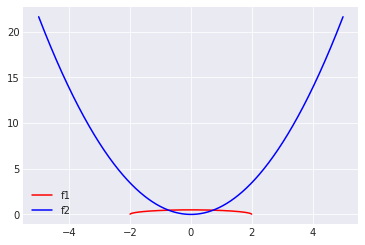

In [11]:
def f1(x):
    return np.sqrt(4 - np.power(x, 2)) / 4

def f2(x):
    return np.sqrt(3) * np.power(x, 2) / 2

x = np.linspace(-5, 5, 1000)

f1_x = f1(x)
f2_x = f2(x)

plt.plot(x, f1_x, color='red', label='f1')
plt.plot(x, f2_x, color='blue', label='f2')
plt.legend()

### b) Calculate analytically the roots of $f$, i.e., the intersection of the sets $\mathcal{S}_1$ and $\mathcal{S}_2$.

The roots of $f$ are given when the zeros of $f_1$ equal the zeros of $f_2$. This corresponds to the set of tuples 

\begin{align}
(x, y): & y = \dfrac{\sqrt{4 - x^2}}{4} = \dfrac{\sqrt{3}x^2}{2} \\
& \iff \dfrac{4 - x^2}{16} = \dfrac{3x^4}{4} \\
& \iff 3x^4 + x^2 / 4 - 1 = 0
\end{align}

Using the quadratic formula on $x^2$, we have as the real roots of $x$ being

$$\pm \sqrt{\dfrac{-1/4 + \sqrt{1/16 + 12}}{6}}$$



### c) Calculate the Jacobian of $f$.

$$\partial_x f_1(x, y) = 2x, \\
  \partial_y f_1(x, y) = 8y, \\
  \partial_x f_2(x, y) = -2\sqrt{3}x, \\
  \partial_y f_2(x, y) = 2$$
  
Then the Jacobian is given by

\begin{bmatrix}
2x & 8y \\
-2\sqrt{3}x & 2
\end{bmatrix}

### d) Implement the Newton method in 2D and use it to calculate the first $5$ iterates for the starting values $(x_0, y_0) = (2, 3)$ and $(x_0, y_0) = (-1.5, 2)$. Plot these iterates in the $xy$-plane together with the curves $\mathcal{S}_1$ and $\mathcal{S}_2$.

The inverse Jacobian is given by 

$$\dfrac{1}{4x + 16\sqrt{3}x}
\begin{bmatrix} 
2 & -8y \\
2\sqrt{3}x & 2x
\end{bmatrix}$$

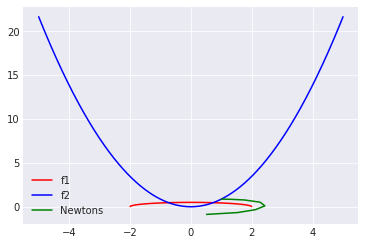

In [65]:
# return 2x2 array
def inverse_jacobian(x, y):
    determinant = 4*x + 16*np.sqrt(3)*x
    inverse_matrix = np.array([[2, -8*y],
                               [2*np.sqrt(3)*x, 2*x]])
    return  (1 / determinant) * inverse_matrix

# return 2x1 array
def f(x, y):
    return np.array([[np.power(x, 2) + 4*np.power(y, 2) - 4], 
                      [2*y - np.sqrt(3)*np.power(x, 2)]])

# return 2x1 array
def newtons(x, y):
    old_estimate = np.array([[x], [y]])
    new_estimate = old_estimate - np.dot(inverse_jacobian(x, y), f(x, y))
    return new_estimate

estimates = []
values = np.array([[2], [3]])
for i in range(100):
    values = newtons(values[0][0], values[1][0])
    estimates.append(values)
    
estimates = np.concatenate(estimates, axis=1).T

plt.plot(x, f1_x, color='red', label='f1')
plt.plot(x, f2_x, color='blue', label='f2')
plt.plot(estimates[:,0], estimates[:,1], color='green', label='Newtons')
plt.legend()

# 3. Given $A$ is a tridiagonal matrix, i.e., a matrix with nonzero entries only in the diagonal and the first upper and lower subdiagonals: $$A = 
\begin{bmatrix}
a_1 & c_1 \\
b_1 & a_2 & c_2 \\
& \ddots & \ddots & \ddots \\
& & b_{n-2} & a_{n-1} & c_{n-1} \\
& & & b_{n-1} & a_n
\end{bmatrix}.$$

# Assuming that $A$ has an LU decomposition $A = LU$ with $$L =
\begin{bmatrix}
1 \\
d_1 & 1 \\
& \ddots & \ddots \\
& & d_{n-1} & 1
\end{bmatrix}
,
\quad
U = 
\begin{bmatrix}
e_1 & f_1 \\
& \ddots & \ddots \\
& & e_{n-1} & f_{n-1} \\
& & & e_n
\end{bmatrix},$$ derive recursive expressions for $d_i, e_i,$ and $f_i$.

Notice that $a_i = d_{i-1} f_{i-1} + e_i$, $c_i = f_i$, and $b_i = d_i e_i$. We can also back out the values of $d_1 = b_1/a_1$, $e_1 = a_1$, and $f_1 = c_1$. In particular, $f_i = c_i$.

Then we can calculate $e_{i+1} = d_i e_i - d_i f_i$. Using $e_{i+1}$ we can calculate $d_{i+1}$ using the formula $d_{i+1} = b_{i+1} / e_{i+1}$.

## 4. We study basic properties of the LU-factorization. 

### a) Give an example of an invertible $3\times 3$ matrix that does not have any zero entries, for which the LU decomposition without pivoting fails.

$A = 
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 2 \\
2 & 2 & 1
\end{bmatrix}$

The first row reduction will set the first two entries of row two to $0$, making further decompositions impossible.

### b) Show that the LU factorization of an invertible matrix $A\in \mathbb R^{n\times n}$ is unique. That is, if $A = LU = L_1U_1 $ with upper triangular matrices $U$, $U_1$ and unit lower triangular matrices $L$, $L_1$, then necessarily $L=L_1$  and $U=U_1$. You can use the results we discussed in class about products of lower/upper triangular matrices, and their inverses.

Using the equality $LU = L_1 U_1$, we know that $L = L_1 U U_1^{-1}$ and $U = L^{-1} L_1 U_1$. Then $A$ can be rewritten as $L_1 U U_1^{-1} L^{-1} L_1 U_1$. Since we know $L_1 U_1 = A$, then it must be the case that the matrices in the center $U U_1^{-1} L^{-1} L_1 = I$, where $I$ is the identity matrix.

This can be written as $U U_1^{-1} = L_1^{-1} L$. Note that $J = U U_1^{-1}$ is upper triangular, since it is the product of two upper triangular matrices. But then note also that $J = L_1^{-1} L$ is also lower triangular, since it is the product of two lower triangular matrices. Then J is both upper and lower triangular, making it a diagonal matrix. Since $JJ = J^2 = I$, the only matrix $J$ can be is $I$ itself.

This gives us $L_1^{-1}L = I$; using the uniqueness of inverses we know $L = L_1$. It naturally follows that $U = U_1$.

## 5. For a given dimension $n$, fix some $k$ with $1\leq k\leq n$. Now let $L\in \mathbb R^{n\times n}$ be a non-singular lower triangular matrix and let the vector $\textbf{b} \in\mathbb{R}^{n}$ be such that $b_i =0$ for $i =1, 2,\ldots,k$.

### a) Let the vector $y \in\mathbb{R}^{n}$ be the solution of $Ly = b$. Show, by partitioning $L$ into blocks, that $y_j =0$ for $j=1, 2,\ldots,k.$

Because $L$ is non-singular, we know that all entries on the diagonal must be non-zero. Since $0 = b_1 = L_{11}y_1$ and $L_{11} \neq 0$, because it is on the diagonal, it must be the case that $y_1 = 0$. The proof proceeds by simple induction. 

Assume that $y_1, ..., y_{k-1}$ are all $0$, so that $b_1, ..., b_{k-1}$ are $0$. Since $b = \sum_{i=1}^n y_i L_j$, where $L_j$ is the $j$th column of $L$, we know the first $k-1$ terms of the vector summation are $0$; then $b$ is a linear combination of the $k$ through $n$th columns of $L$. But because $L$ is lower diagonal, only the first $k$ columns of $L$ have nonzero terms in the $k$th entry. **Then for the $k$th entry of $b$ to be $0$, the coefficient $y_k$ for the $k$th column of $L$ must also equal $0$.**

### b) Use this to give an alternative proof of Theorem 2.1(iv), i.e., that the inverse of a non-singular lower triangular matrix is itself lower triangular.

Consider $L^{-1}_k$, the $k$th column of $L^{-1}$. $L$ sends $L^{-1}_k$ to the $k$th column of $I$, which is just the $k$th basis vector with the $k$th entry being $1$ and all other entries being $0$. Then using the property derived in **a)**, we know the first $k - 1$ entries of $L^{-1}_k$ are $0$. But then $L^{-1}$ is a lower diagonal matrix if this holds true for all $k \in (1, ..., n)$, which it does.

## 6. Let $n \geq 2$. Consider a matrix $A \in \mathbb{R}^{n\times n}$ for which every leading principal  submatrix of order less than $n$ is non-singular.

### a) Show that $A$ can be factored in the form $A = LDU$, where $L\in\mathbb{R}^{n\times n}$ is unit lower triangular, $D \in\mathbb{R}^{n\times n}$ is diagonal and $U\in\mathbb{R}^{n\times n}$ is unit upper triangular.

We already know that because all leading principal submatrices are non-singular, there exists a decomposition $A = L_1 U_1$, where $L_1$ is unit lower triangular. Simply let $D$ be the diagonal entries of $U_1$; note that $D^{-1}$ is a diagonal matrix. Then $U = D^{-1}U_1$ is unit upper triangular, giving us the decomposition.

### b) If the factorization $A = LU$ is known, where $L$ is unit lower triangular and $U$ is upper triangular, show how to find the LU-factors of the transpose $A^T$. Note that our requirement for an LU-factorization is that $L$ is unit lower triangular, and $U$ is upper triangular.

$A^T$ is simply $(LDU)^T = U^T D^T L^T$, where $U$ is unit triangular in the manner of **a)**. Now $U^T$, being the transpose of a unit upper triangular matrix, is a unit lower triangular matrix which we will call $L_1$. The transpose of the diagonal matrix $D^T$ is simply $D$, and the transpose of $L^T$ is a unit upper triangular matrix. Multiply $D$ into $L^T$ gets our $U_1$, the upper triangular matrix for which $A^T = L_1 U_1$.

## 7. Implement backward substitution to solve systems $U x= b$, i.e., write a function `x = backward(A,b)`, which expects as inputs an upper triangular matrix $U\in \mathbb  R^{n\times n}$, and a right hand side vector $b\in \mathbb R^n$, which returns the solution vector $ x\in \mathbb R^n$. The function should find the size $n$ from the vector $ b$ and also check if the matrix and the vector sizes are compatible before it starts to solve the system.  Apply your program for the computation of for $x\in\mathbb{R}^4$, with $U =  \begin{bmatrix} 1 & 2 & 6 & -1 \\ 0 & 3 & 1 & 0 \\0 & 0 & 4 & -1 \\ 0 & 0 & 0 & 2\end{bmatrix},\quad b = \begin{bmatrix} -1 \\ -3  \\-2 \\ 4 \end{bmatrix}.$

In [93]:
# accept nxm A
# nx1 b
# return mx1 x
def backward(A, b):
    n = len(A)
    m = A.shape[1]
    
    x = np.zeros(m)
    
    # solve from the bottom up for the entries of x
    for i in range(m):
        index = m - i - 1
        x[index] = (b[index] - A[index,:].dot(x).sum()) / A[index, index]
    
    return x

A = np.array([[1, 2, 6, -1],
              [0, 3, 1, 0],
              [0, 0, 4, -1],
              [0, 0, 0, 2]])

b = np.array([[-1],
              [-3],
              [-2],
              [4]])

backward(A, b)

array([ 3., -1.,  0.,  2.])

## 8. Implement the LU factorization, and apply it to the matrix $A = 
  \begin{bmatrix}
    6 & 2 & 1 & -1 \\ 2 & 4 & 1 & 0 \\ 1 & 1 & 4 & -1 \\ -1 & 0 & -1 & 3
  \end{bmatrix}.$
## Generalize your code to handle input matrices $A$ of any size $n \geq 2$.

In [151]:
# accept nxn A
# return two matrices L, U
def LU(A):
    n = len(A)
    L = np.identity(n)
    U = A.copy()
    # index by each row in A
    for i in range(n):
        # check if U[i, i] is too small; throw error if so
        if abs(U[i, i]) < 10**-8:
            raise Exception('Diagonal entry {} too small with value {}'.format(i, U[i,i]))
        # (n- i - 1)x1 vector determining how much to subtract each row
        coeff = U[i+1:,i] / U[i, i]
        # insert coeff into ith column of L below the diagonal
        L[1+i:,i] = coeff
        # iteratively subtract ith row of U from rows below
        for j in range(n - i - 1):
            U[(i + 1 + j),:] = U[(i + 1 + j),:] - coeff[j]*U[i, :]
    return L, U

A = np.array([[6, 2, 1, -1],
              [2, 4, 1, 0],
              [1, 1, 4, -1],
              [-1, 0, -1, 3]])

L, U = LU(A)

In [152]:
L

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.33333333,  1.        ,  0.        ,  0.        ],
       [ 0.16666667,  0.        ,  1.        ,  0.        ],
       [-0.16666667,  0.        ,  0.        ,  1.        ]])

In [153]:
U

array([[ 6,  2,  1, -1],
       [ 0,  3,  0,  0],
       [ 0,  0,  3,  0],
       [ 0,  0,  0,  2]])

## 9. Let us use the $LU$-decomposition to compute the inverse of a matrix. This problem illustrates that computing a matrix inverse is significantly more expensive than solving a linear system.

### a) Describe an algorithm that uses the $LU$-decomposition of an $n \times n$ matrix $A$ for computing $A^{-1}$ by solving $n$ systems of equations (one for each unit vector).

Assume we have the $L$ and $U$ matrices such that $LU = A$, and that $A, L, U \in \mathbb{R}^{nxn}$. Letting $e_k$ be the $k$th basis vector of $\mathbb{R}^{nxn}$, we know $A^{-1}_k$, the $k$th column of $A^{-1}$, has the property that $AA^{-1}_k = e_k$, since $e_k$ is the $k$th column of $I$.

Let $y_k = UA^{-1}_k$. Use backward substitution to solve $Ly_k = e_k$ for $y_k$. Then use forward substitution to solve $UA^{-1}_k = y_k$ for $A^{-1}_k$. This gives us the $k$th column of $A^{-1}$; if we do this process for all $n$ columns of $A$, then we have computed $A^{-1}$.

### b) Calculate the floating point operation count of this algorithm.

Solving one column requires a single backward and forward pass, each requiring operations on the order of $\Omega(n^2)$. Then because there are $n$ columns of $A^{-1}$ in total, the complexity of the matrix inverse is on the order of $\Omega(n^3)$.

### c) Improve the algorithm by taking advantage of the structure (i.e., the zero entries) of the right-hand side. What is the new algorithm's floating point operation count.